# 1.1 Birth Rates

The data on US births, provided by the CDC is in `data/births.csv`.

Reproduce the following plot of births by gender over time given the data:

![](births_gender.png)

Note the `1e6` on the y axis for scale

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime as dt

total_births = pd.read_csv('data/births.csv')

total_births.head(3)
#total_births.info()
#total_births.describe()
# 480 null in 'day'
#total_births.day.isnull().sum()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454


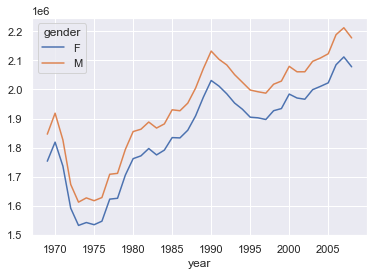

In [2]:
# Exercise # 1.1 Answer:

(total_births.groupby(['year', 'gender'])['births']
   .sum()
   .unstack('gender', fill_value=0)
   .plot())

plt.show()

# 1.2 Births anomalies

This was analyzed by beloved statistician Andrew Gelman [here](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/), leading to this plot:

![](births_gp100.png)

Explain all three plots in Gelman's figure. 

**1.2:** What is the periodic component? What is the residual? Use your research skills to learn then explain it (in english).

In [ ]:
''' Exercise 1.2

I don't have the knowledge or vocabulary to explain Gelman's figure.

'''

# 1.3 Holiday Anomalies Plot

Reproduce *as best you can* the first of the 3 figures from Andrew Gelman's blog post (your plot may have small differences)

**1.3.1:** Reproduce the births line in a plot. Hint: Make the x axis a `pd.datetime` object

**1.3.2:** Reproduce the `smoothed` line. Hint: use a rolling window average

**1.3.3:** Reproduce the entire figure with the mean line as a horizontal. You can make the y axis total births instead of a % deviation from mean axis (they'll look the same anyway)

In [ ]:
'''Exercise 1.3

Considering I couldn't even explain Gelman's figure,
for me plotting it was a stretch I didn't have time to tackle
before the deadline.

'''

# 2. Recipe Database

### 2.1 

Load the JSON recipe database we saw in lecture 4.

How many of the recipes are for breakfast food? Hint: The `description` would contain the work "breakfast"

In [3]:
import numpy as np
import pandas as pd

with open('data/recipe.json', 'r') as f:
    data = (line.strip() for line in f)
    data_json = f"[{','.join(data)}]"

recipes = pd.read_json(data_json)
recipes.head(3)

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,prepTime,description,totalTime,creator,recipeCategory,dateModified,recipeInstructions
0,{'$oid': '5160756b96cc62079cc2db15'},Drop Biscuits and Sausage Gravy,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,http://thepioneerwoman.com/cooking/2013/03/dro...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276011104},PT30M,thepioneerwoman,12,2013-03-11,PT10M,"Late Saturday afternoon, after Marlboro Man ha...",NaN,NaN,NaN,NaN,NaN
1,{'$oid': '5160756d96cc62079cc2db16'},Hot Roast Beef Sandwiches,12 whole Dinner Rolls Or Small Sandwich Buns (...,http://thepioneerwoman.com/cooking/2013/03/hot...,http://static.thepioneerwoman.com/cooking/file...,{'$date': 1365276013902},PT20M,thepioneerwoman,12,2013-03-13,PT20M,"When I was growing up, I participated in my Ep...",NaN,NaN,NaN,NaN,NaN
2,{'$oid': '5160756f96cc6207a37ff777'},Morrocan Carrot and Chickpea Salad,Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...,http://www.101cookbooks.com/archives/moroccan-...,http://www.101cookbooks.com/mt-static/images/f...,{'$date': 1365276015332},NaN,101cookbooks,NaN,2013-01-07,PT15M,A beauty of a carrot salad - tricked out with ...,NaN,NaN,NaN,NaN,NaN


In [4]:
# Exercise 2.1 Answer: How many of the recipes are for breakfast food? 
# Hint: The description would contain the word "breakfast"

recipes.description.str.count("breakfast").sum().astype(int)
    

3643

### 2.2 A simple recipe recommender

Let's build a recipe recommender: given a list of basic ingredients, find a recipe that uses all those ingredients.

Here is the list of ingredients that can be asked for:

```
['salt', 'pepper', 'oregano', 'sage', 'parsley',
 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']
```

**Hint:** Build a new column for each of the ingredients that indicates whether that ingredient is in the recipe.

**example:**
```
recommend_ingredients(["parsley", "paprika", "tarragon"], df)

result: 
# The rows where these 3 ingredients are in the recipe
[2069, 74964, 93768, 113926, 137686, 140530, 158475, 158486, 163175, 165243]
```

In [5]:
recipes.ingredients

0         Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
1         12 whole Dinner Rolls Or Small Sandwich Buns (...
2         Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...
3         Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
4         For each bowl: \na big dollop of Greek yogurt\...
                                ...                        
173273    250 milliliters Cream\n395 grams Canned Sweete...
173274    2 cups Candy Corn\n1 teaspoon Vanilla Extract\...
173275    1/4 cup ground cumin\n1/4 cup kosher salt\n2 t...
173276    Two 16 ounce cans Old El Paso Refried Beans\n4...
173277    ⅓ cup melted coconut oil or extra-virgin olive...
Name: ingredients, Length: 173278, dtype: object

In [6]:
# data cleaning: removing \n

recipes = recipes.replace(r'\n',' ', regex=True) 
recipes.ingredients

0         Biscuits 3 cups All-purpose Flour 2 Tablespoon...
1         12 whole Dinner Rolls Or Small Sandwich Buns (...
2         Dressing: 1 tablespoon cumin seeds 1/3 cup / 8...
3         Biscuits 3 cups All-purpose Flour 2 Tablespoon...
4         For each bowl:  a big dollop of Greek yogurt 2...
                                ...                        
173273    250 milliliters Cream 395 grams Canned Sweeten...
173274    2 cups Candy Corn 1 teaspoon Vanilla Extract 1...
173275    1/4 cup ground cumin 1/4 cup kosher salt 2 tab...
173276    Two 16 ounce cans Old El Paso Refried Beans 4 ...
173277    ⅓ cup melted coconut oil or extra-virgin olive...
Name: ingredients, Length: 173278, dtype: object

In [7]:
'''
I was wondering if there was a way to use 'get_dummies'
to help with this exercise...
'''

spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

dummies = pd.get_dummies(spice_list)
dummies

,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,1
8,0,0,1,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0


In [8]:
'''
But a solution with 'contains' is more effective.
After a lot of searching, I found this from 
Python Data Science Handbook.

It creates a boolean df to see if the list of ingredients
in 'spice_list' are in the recipes df.

'''

import re
spices_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                             for spice in spice_list))
spices_df.head(3)

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True


In [9]:
# Exercise 2.2 Answer:

'''
Then I specified the selection with the desired ingredients
and outputted the indices.
'''

selection = spices_df.query('parsley & paprika & tarragon')
recipes.index[selection.index]

Int64Index([2069, 74964, 93768, 113926, 137686, 140530, 158475, 158486, 163175,
            165243],
           dtype='int64')

# 3. Movies!

Recall the [Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) from lecture 4. It's made up of several tables which we've played with in lecture 4.

The tables have common columns (`id` and `movie_id`) around which you can merge and join tables.

### 3.1 best director

Your task is to find **The best director** in terms of average ratings of his movies. This can be from the `ratings` or `ratings_small` table, or simply the vote average in the `metadata` table. The director can be found in the `cast` table.

You will have to use all of your skills to get this done, between using groupbys and merging multiple tables together

In [ ]:
'''
The read_gdrive(url) function didn't work for me, so I used data_fetch.

There is no "cast" table.

With Javad's help, I found directors in the "credits" table

Once I found where the directors were, 
the main challenge was to change the df_meta 'id'
from string to integer 64. 

I finally found [pd.to_numeric(df_meta.id, errors='coerce').isnull()]).
It was the .isnull() portion that was missing in my code. I was then
able to drop the rows that could not converted to integer 64.

Once both 'id' columns were the same integer 64 type, I was able to merge
my dfs. I decided to filter the 'vote_count' >= 2060, because that was
the column's mean.

Based on that criteria, the best director in terms of average ratings of movies was:
Frank Darabont    8.35

'''

In [10]:
import pandas as pd

data_fetch = 'archive/movies_metadata.csv'
df_meta = pd.read_csv(data_fetch)

df_meta.head(2)

# 'id' is str with no null, 'vote average' is float with 6 nulls, 'original title' is str and no null
#df_meta.dtypes

# 45466 = 0 to 45465, id no nulls, id is string
#df_meta.info()

/Users/celiagoogle/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [11]:
df_meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [12]:
# 'id' is a string. '862' refers to Toy Story.
df_meta.loc[df_meta['id'] == '862']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [13]:
(df_meta[pd.to_numeric(df_meta.id, errors='coerce').isnull()])

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df_meta['id'] = pd.to_numeric(df_meta['id'])
#movies['id'] = movies['id'].apply (pd.to_numeric, errors='coerce')
#movies['id'] = movies['id'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [14]:
df_meta = df_meta.drop([19730, 29503,35587 ])

In [15]:
# victory!!!
df_meta['id'] = pd.to_numeric(df_meta['id'])

In [16]:
movies = df_meta[['id', 'original_title', 'vote_average', 'vote_count']]
movies.head(2)


,id,original_title,vote_average,vote_count
0,862,Toy Story,7.7,5415.0
1,8844,Jumanji,6.9,2413.0


In [17]:
# CREDITS

data_fetch = 'archive/credits.csv'
df_credits = pd.read_csv(data_fetch)
df_credits.head(2)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


In [18]:
# 45476: 0 to 45475 id no nulls, id is integer 
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [19]:
# OK, here id 862 also refers to Toy Story also. Phew!
# 'id' is an integer 64
df_credits.loc[df_credits['id'] == 862]

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


In [20]:
df_credits.columns

Index(['cast', 'crew', 'id'], dtype='object')

In [21]:
df_credits["crew"] = df_credits.crew.apply(eval)

In [22]:
df_credits.crew[0][0]['job']

'Director'

In [23]:
def find_director(crew):
    """ Crew is a tuple that has a film's crew, so we can loop into that and check each person"""
    for person in crew:
        if person['job'] == 'Director': # if the person is the director return its name
            return person['name']
        
df_credits['Director'] = df_credits.crew.apply(find_director) # now apply on all rows and get the director

In [24]:
df_credits.head(2)

,cast,crew,id,Director
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston


In [25]:
# merge dfs

df_final = pd.merge(
    movies, 
    df_credits, 
    on='id',
    how='right'
)

df_final # Yes!

,id,original_title,vote_average,vote_count,cast,crew,Director
0,862,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter
1,8844,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston
2,15602,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch
3,31357,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker
4,11862,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer
...,...,...,...,...,...,...,...
45533,439050,رگ خواب,4.0,1.0,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",Hamid Nematollah
45534,111109,Siglo ng Pagluluwal,9.0,3.0,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",Lav Diaz
45535,67758,Betrayal,3.8,6.0,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",Mark L. Lester
45536,227506,Satana likuyushchiy,0.0,0.0,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",Yakov Protazanov


In [ ]:
#df_final.describe()

In [26]:
'''I used the value of mean for 'vote_count'
to filter out high vote averages with low
vote counts
'''

df_final = df_final.loc[
    (df_final.vote_count >= 2060)
]

In [27]:
# Exercise 3 answer: 

mean_average_director = (
    df_final.groupby('Director')
       .mean()['vote_average']
)

mean_average_director
sort = mean_average_director.sort_values(ascending=False)
sort[0:1]

Director
Frank Darabont    8.35
Name: vote_average, dtype: float64